In [4]:
import argparse as ap
from collections import namedtuple
import csv
from enum import Enum
import jax as jax
import jax.numpy as np
import math as math
import matplotlib.pyplot as plt
import numpy as onp
import pandas as pd
import pickle as pl
import random as rand
import time as time

In [20]:
input_mol = "benzene"
input_ticks = 10000000
dt = 1e-18
energyHistory = pd.read_csv(input_mol + '_energyHistory.csv')
bondHistory = pd.read_csv(input_mol + '_bondLengthHistory.csv')
dataLen = energyHistory["time"].count()
dataLen

100001

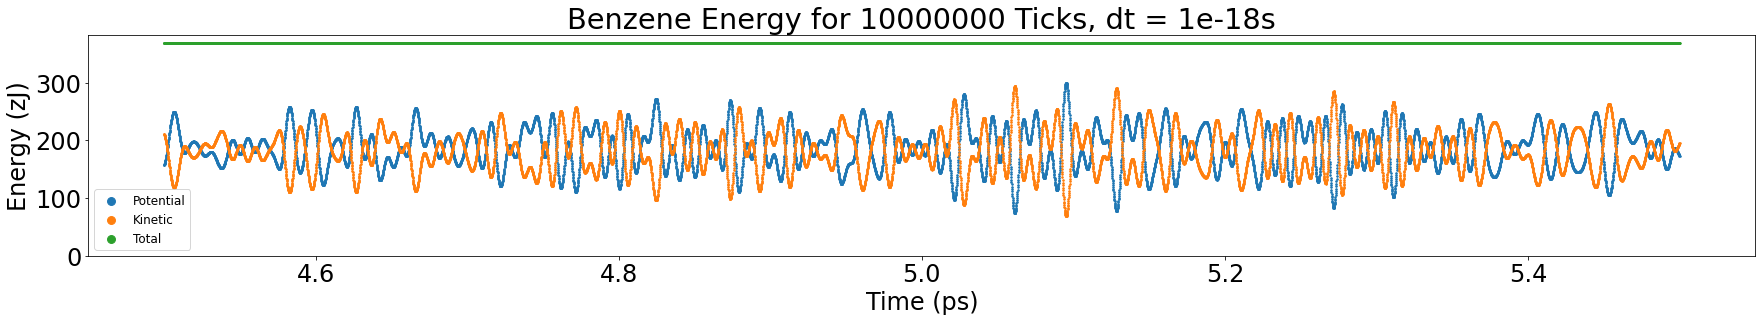

<Figure size 432x288 with 0 Axes>

In [28]:
def draw_energy(energyHistory, input_mol, input_ticks, dt, q_start, q_end, out_file = None, title_suffix = ""):
    dataLen = energyHistory["time"].count()
    font = {'family' : 'DejaVu Sans',
        'size' : min(max(12, dataLen / 300 * (q_end - q_start) / 4), 24)}

    rng = range(int(q_start * dataLen / 4), int(q_end * dataLen / 4))

    plt.figure(figsize = (min(max(10, dataLen / 100 * (q_end - q_start) / 4), 25), 5))
    plt.rc('font', **font)
    plt.scatter(energyHistory["time"][rng], energyHistory["potentialE"][rng], label = 'Potential', s = 2.5)
    plt.scatter(energyHistory["time"][rng], energyHistory["kineticE"][rng], label = 'Kinetic', s = 2.5)
    plt.scatter(energyHistory["time"][rng], energyHistory["potentialE"][rng] + energyHistory["kineticE"][rng], label = 'Total', s = 2.5)

    plt.title(input_mol.capitalize() + " Energy for " + str(input_ticks) + " Ticks" + title_suffix + ", dt = " + str(dt) + "s")
    plt.xlabel('Time (ps)')
    plt.ylabel('Energy (zJ)')
    plt.ylim(bottom=0)
    plt.legend(prop = {'size' : min(max(12, dataLen / 400 * (q_end - q_start) / 4), 12)}, markerscale = 5)
    plt.tight_layout()

    if out_file is None:
        plt.figure()
    else:
        plt.savefig(out_file)

draw_energy(energyHistory, input_mol, input_ticks, dt, 1.8, 2.2, None, "")

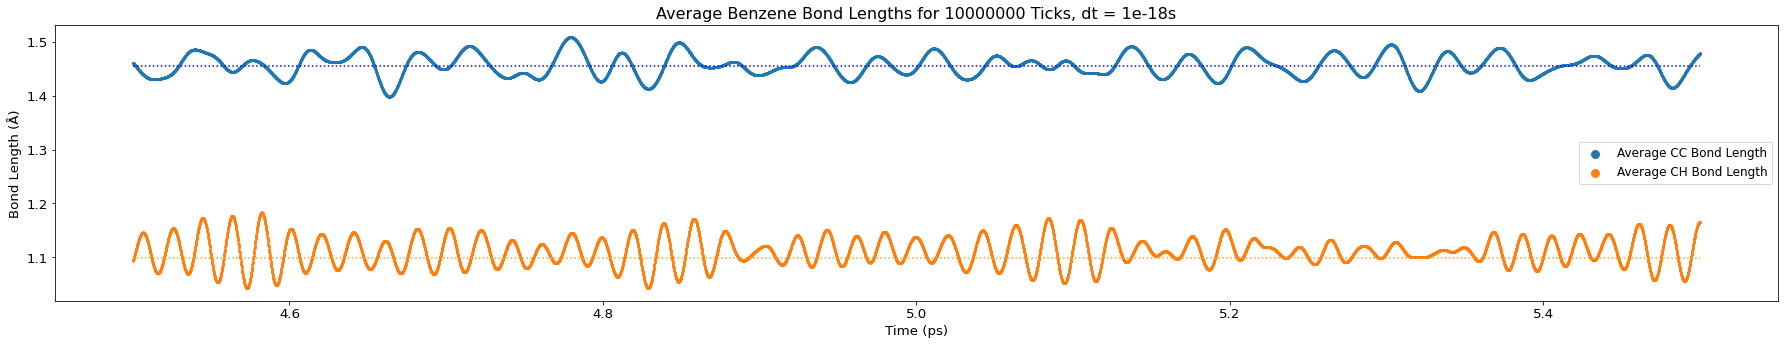

<Figure size 432x288 with 0 Axes>

In [29]:
def draw_bond(bondHistory, input_mol, input_ticks, dt, q_start, q_end, out_file = None, title_suffix = ""):
    dataLen = bondHistory["time"].count()
    font = {'family' : 'DejaVu Sans',
        'size' : min(max(12, dataLen / 750 * (q_end - q_start) / 4), 24)}

    rng = range(int(q_start * dataLen / 4), int(q_end * dataLen / 4))

    plt.figure(figsize = (min(max(10, dataLen / 400 * (q_end - q_start) / 4), 25), 5))
    plt.rc('font', **font)
    plt.plot([bondHistory["time"][int(q_start * dataLen / 4)], bondHistory["time"][int(q_end * dataLen / 4) - 1]], [1.455, 1.455], color = 'blue', linestyle = ':')
    plt.plot([bondHistory["time"][int(q_start * dataLen / 4)], bondHistory["time"][int(q_end * dataLen / 4) - 1]], [1.099, 1.099], color = 'orange', linestyle = ':')

    plt.scatter(bondHistory["time"][rng], bondHistory["CC_Bonds"][rng], label = 'Average CC Bond Length', s = 2.5)
    plt.scatter(bondHistory["time"][rng], bondHistory["CH_Bonds"][rng], label = 'Average CH Bond Length', s = 2.5)

    plt.title("Average " + input_mol.capitalize() + " Bond Lengths for " + str(input_ticks) + " Ticks" + title_suffix + ", dt = " + str(dt) + "s")
    plt.xlabel('Time (ps)')
    plt.ylabel('Bond Length (Å)')
    plt.legend(prop = {'size' : min(max(12, dataLen / 1000 * (q_end - q_start) / 4), 12)}, markerscale = 5)
    plt.tight_layout()

    if out_file is None:
        plt.figure()
    else:
        plt.savefig(out_file)

draw_bond(bondHistory, input_mol, input_ticks, dt, 1.8, 2.2, None, "")